## Mapas de calor 

In [1]:
import pandas as pd
import os
import csv
import numpy as np
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

from dbfread import DBF

In [2]:
os.chdir("D:/Trabajo/PUCP/JP/1/EcoMatCom/2021-1/PD5")

1. Importe las bases de datos y muestre las variables que georeferencian las observaciones.

In [3]:
Votos = pd.read_csv('Votaciones.csv', converters={'CCODI_UBIGEO': lambda x: str(x)})

In [4]:
### Código aquí
Votos.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,VOTOS,AUTORIDAD,VOTOS_G
0,AMAZONAS,BAGUA,ARAMANGO,010202,1844,PARTIDO POLITICO NACIONAL PERU LIBRE,533
1,AMAZONAS,BAGUA,BAGUA,010205,5722,PARTIDO POLITICO NACIONAL PERU LIBRE,1580
2,AMAZONAS,BAGUA,COPALLIN,010203,900,PARTIDO NACIONALISTA PERUANO,220
3,AMAZONAS,BAGUA,EL PARCO,010204,353,PARTIDO POLITICO NACIONAL PERU LIBRE,95
4,AMAZONAS,BAGUA,IMAZA,010206,3659,PARTIDO POLITICO NACIONAL PERU LIBRE,1236


In [5]:
len(Votos)

1874

In [6]:
Salarios = pd.read_excel('Salarios.xlsx', converters={'ubigeo': lambda x: str(x)})
Formalidad = pd.read_excel('Formalidad.xlsx', converters={'ubigeo': lambda x: str(x)})
Educacion = pd.read_excel('Educacion.xlsx', converters={'ubigeo': lambda x: str(x)})

Salarios = Salarios.dropna(subset=['Nivel Salario'])
Formalidad = Formalidad.dropna(subset=['Formalidad'])
Educacion = Educacion.dropna(subset=['Nivel Educativo'])

In [7]:
### Código aquí
Salarios.head()

,IDH,p523,p524e1,Salario,Nivel Salario,ubigeo,latitud,longitud
0,708900501501811,4,1720,1720,Hasta 3000,010101,-6.231380,-77.868065
1,708900501504211,4,1500,1500,Hasta 3000,010101,-6.231380,-77.868065
2,708900501506611,4,2500,2500,Hasta 3000,010101,-6.231380,-77.868065
3,708900501508111,4,1975,1975,Hasta 3000,010101,-6.231380,-77.868065
4,662400503201611,4,1460,1460,Hasta 3000,010201,-5.636937,-78.527504


2. Aplique el comando “scatter” de Matplotlib para ver cómo se distribuyen las observaciones en los ejes longitud-latitud.

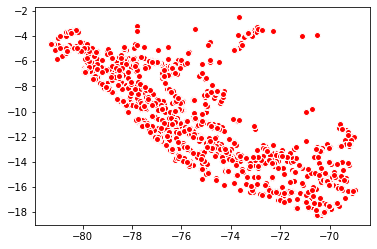

In [8]:
### Código aquí
plt.scatter(x=Salarios.longitud, y=Salarios.latitud, c='red', edgecolor = 'white')

### Ejercicio 2

In [11]:
DATAMAP = DBF('LIMITE_DISTRITAL_2020_INEI_geogpsperu_juansuyo_931381206.dbf', load=True,encoding='latin1')
DATAMAP.records

[OrderedDict([('CCDD', '06'),
              ('NOMBDEP', 'CAJAMARCA'),
              ('CCPP', '05'),
              ('NOMBPROV', 'CONTUMAZA'),
              ('CCDI', '04'),
              ('NOMBDIST', 'GUZMANGO'),
              ('CAPITAL', 'GUZMANGO'),
              ('UBIGEO', '060504'),
              ('IDPROV', '0605'),
              ('CODIGO', '060504'),
              ('CNT_CCPP', 50),
              ('DESCRIPCIO', 'GUZMANGO'),
              ('DESCARGAR', 'www.geogpsperu.com'),
              ('WHATSAPP', '931381206'),
              ('CONTACTO', 'juan.suyo@geogpsperu.com')]),
 OrderedDict([('CCDD', '06'),
              ('NOMBDEP', 'CAJAMARCA'),
              ('CCPP', '11'),
              ('NOMBPROV', 'SAN MIGUEL'),
              ('CCDI', '05'),
              ('NOMBDIST', 'EL PRADO'),
              ('CAPITAL', 'EL PRADO'),
              ('UBIGEO', '061105'),
              ('IDPROV', '0611'),
              ('CODIGO', '061105'),
              ('CNT_CCPP', 15),
              ('DESCRIPCIO', 'E

1. Importe el Shapefile.

In [10]:
shp_path = "LIMITE_DISTRITAL_2020_INEI_geogpsperu_juansuyo_931381206.shp"

In [11]:
### Código aquí
sf = shp.Reader(shp_path)

2. Transforme el Shapefile en un DataFrame de Pandas.

In [12]:
def read_shapefile(sf):
    """
    Esta función nos permite leer un archivo Shape en un DataFrame de Pandas con 
    una columna de  "coordenadas"  manteniendo la geometría de la información. 
    Aquí se usa el paquete pyshp comentado al principio del código.  
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [13]:
### Código aquí
DATASHAPE = read_shapefile(sf)
DATASHAPE.shape

(1874, 16)

3. Muestre cómo lucen las coordenadas que delimitan un distrito del Shapefile.

In [14]:
### Código aquí
DATASHAPE['coords'].iloc[0]

[(-78.91577661290034, -7.320853224796451),
 (-78.91370448767191, -7.322299724952302),
 (-78.91277811311937, -7.3229466001054675),
 (-78.91112936262994, -7.324097475118322),
 (-78.9102204879851, -7.3254009749749684),
 (-78.90983398814802, -7.325955225353312),
 (-78.9088371130423, -7.327616724632094),
 (-78.90742961288629, -7.328613724743548),
 (-78.9033469875734, -7.329544225385632),
 (-78.90196998792459, -7.3298599746580635),
 (-78.90112836278365, -7.332127724914528),
 (-78.90048211265935, -7.333865600017361),
 (-78.89992211291514, -7.335371475213378),
 (-78.89912498802772, -7.336675600098829),
 (-78.89698686335305, -7.338598974762817),
 (-78.89582886301156, -7.340830100128983),
 (-78.89468773844834, -7.342111599870407),
 (-78.89276436288498, -7.343893600209412),
 (-78.8925136130128, -7.34440035019594),
 (-78.89194536288812, -7.345548850099306),
 (-78.89187448821701, -7.346817225134771),
 (-78.89853711289743, -7.354610224781993),
 (-78.89912236290667, -7.355294599865829),
 (-78.8988017

### Ejercicio 3

In [15]:
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(5,20))

In [16]:
%matplotlib inline

1.	Explique a detalle el funcionamiento de la “Función Graficar”, sus argumentos, procesos iterativos y su output.


In [17]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (15,20)):
    '''
    Graficar el mapa con las coordenadas
    '''
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

2.	Grafique el mapa del Perú con la función plot_map().


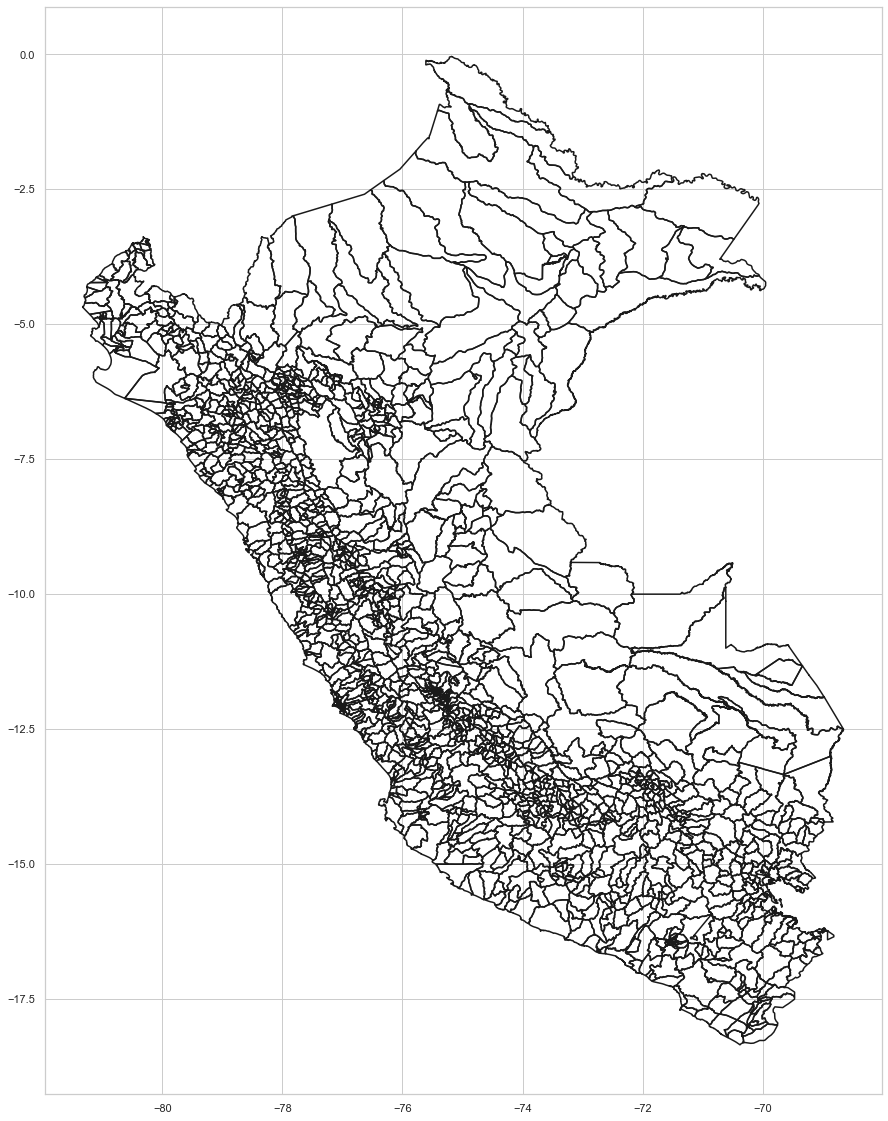

In [18]:
### Código aquí
plot_map(sf)


3.	Cree un gráfico mostrando la distribución de la muestra de “Formalidad” en el mapa del Perú.


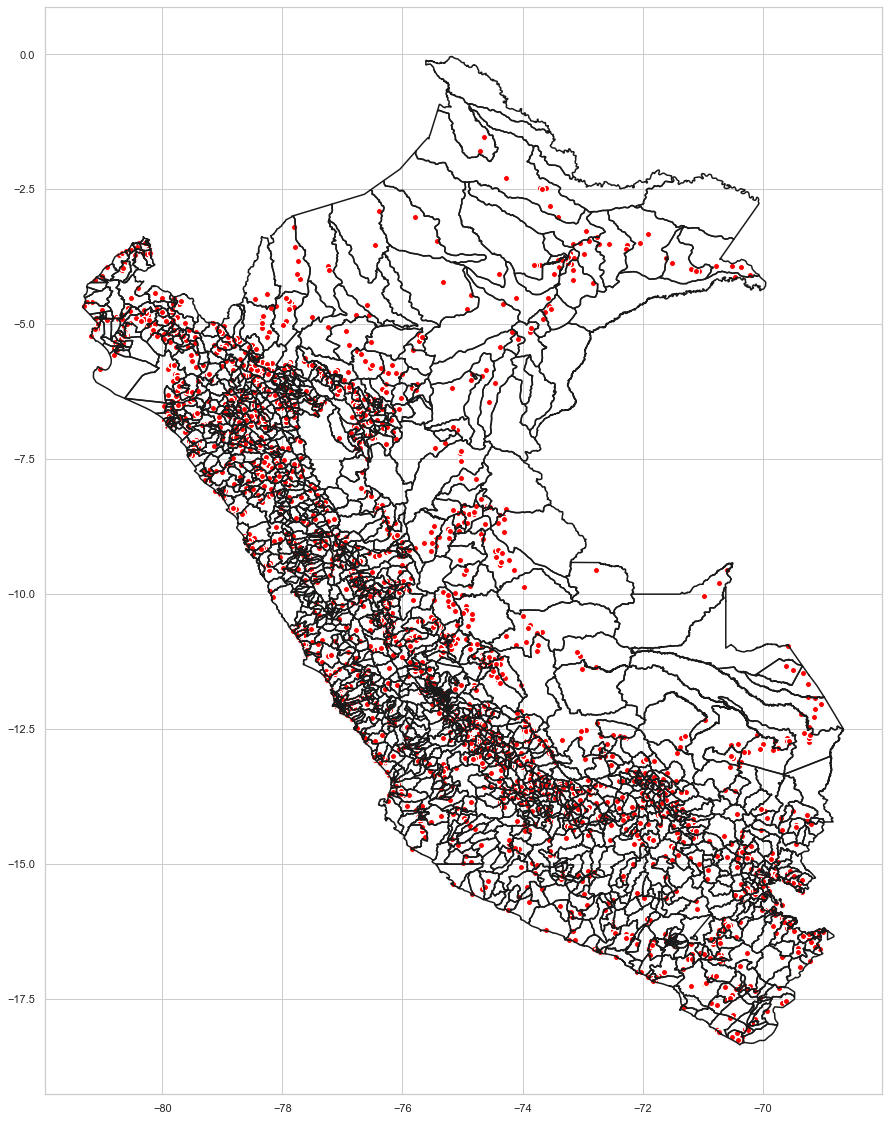

In [19]:
### Código aquí
plot_map(sf)
plt.scatter(x=Formalidad.longitud, y=Formalidad.latitud, c='red', edgecolor = 'white')

4.	Grafique dividiendo la muestra según la variable categórica “Formalidad”.


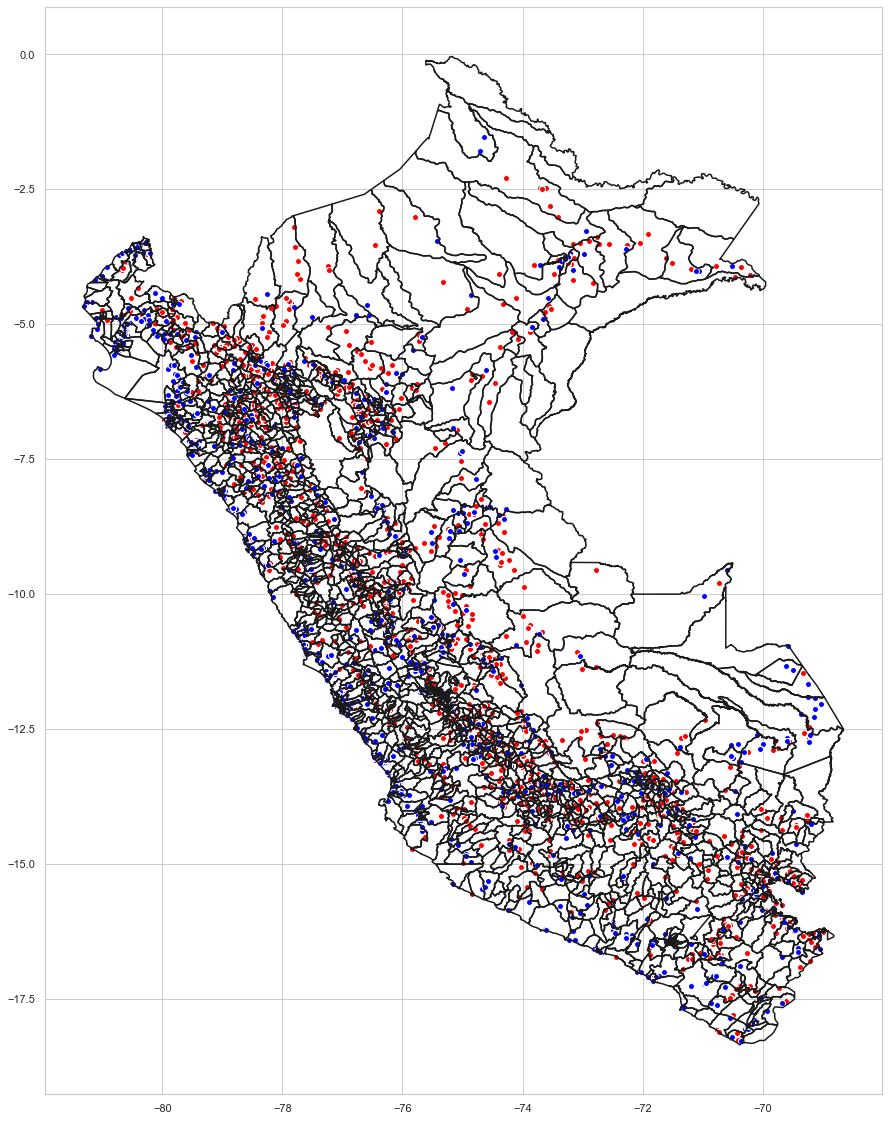

In [20]:
### Código aquí
plot_map(sf)
plt.scatter(x=Formalidad[Formalidad["Formalidad"]=="Informal"].longitud, y=Formalidad[Formalidad["Formalidad"]=="Informal"].latitud, c='red', edgecolor = 'white')
plt.scatter(x=Formalidad[Formalidad["Formalidad"]=="Formal"].longitud, y=Formalidad[Formalidad["Formalidad"]=="Formal"].latitud, c='blue', edgecolor = 'white')

5.	Repita el Ejercicio 3.4. pero cambiando el orden de las variables categóricas. ¿En qué cambia el gráfico?


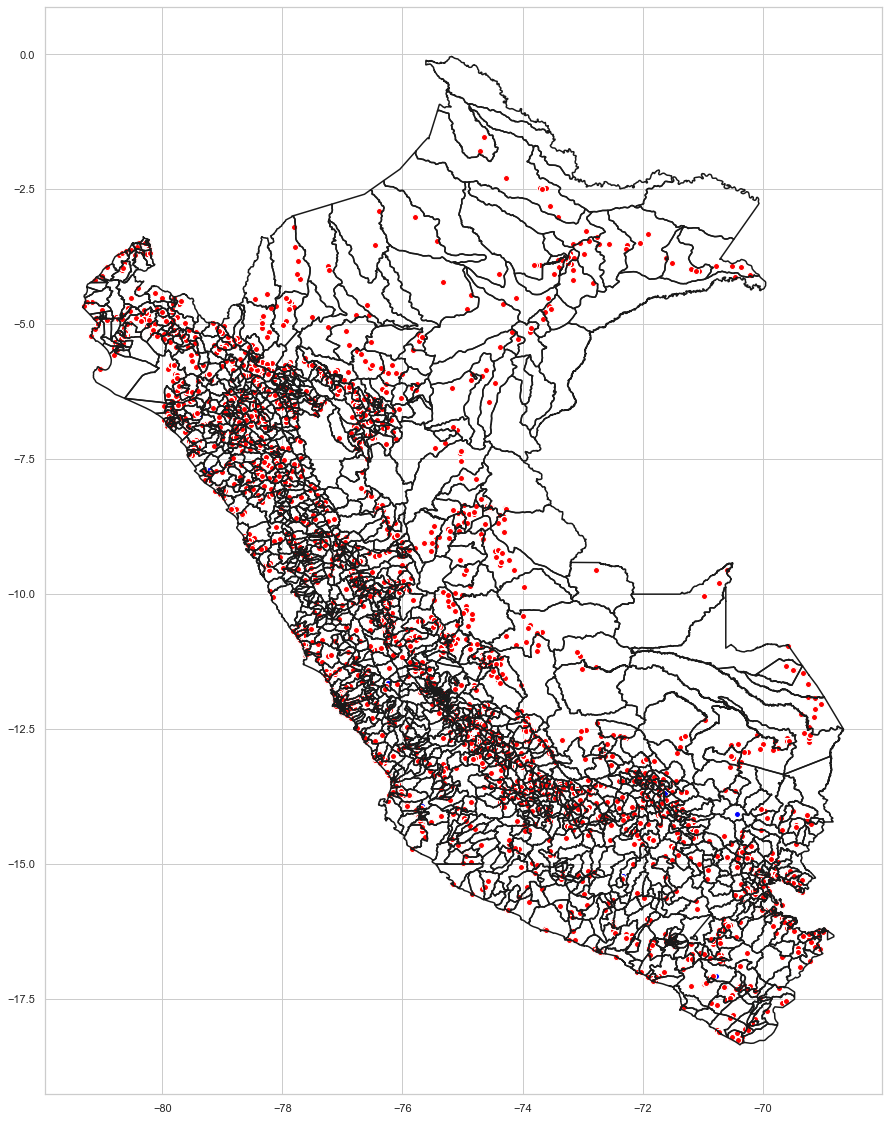

In [21]:
### Código aquí
plot_map(sf)
plt.scatter(x=Formalidad[Formalidad["Formalidad"]=="Formal"].longitud, y=Formalidad[Formalidad["Formalidad"]=="Formal"].latitud, c='blue', edgecolor = 'white')
plt.scatter(x=Formalidad[Formalidad["Formalidad"]=="Informal"].longitud, y=Formalidad[Formalidad["Formalidad"]=="Informal"].latitud, c='red', edgecolor = 'white')

6.	Realice el mismo ejercicio para la base “Salarios” y “Educación”.


In [ ]:
### Código aquí
plot_map(sf)
plt.scatter(x=Salarios[Salarios["Nivel Salario"]=="Mínimo o menos"].longitud, y=Salarios[Salarios["Nivel Salario"]=="Mínimo o menos"].latitud, c='red', edgecolor = 'white')
plt.scatter(x=Salarios[Salarios["Nivel Salario"]=="Hasta 3000"].longitud, y=Salarios[Salarios["Nivel Salario"]=="Hasta 3000"].latitud, c='green', edgecolor = 'white')
plt.scatter(x=Salarios[Salarios["Nivel Salario"]=="Hasta 20,000"].longitud, y=Salarios[Salarios["Nivel Salario"]=="Hasta 20,000"].latitud, c='blue', edgecolor = 'white')

### Ejercicio 4

1.	A partir de la función plot_map(), cree una función que grafique un subconjunto de distritos. Añadir los siguientes argumentos:
1.1.	Title: Título del gráfico (string)
1.2.	CODIGO: Lista de los códigos de los distritos (list).


In [22]:
def Plot_SubMap(title, CODIGO, sf,x_lim = None,y_lim = None,figsize = (10,16),NomDist=False):
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    ### Código aquí
    for id in CODIGO:
        shape_ex = sf.shape(id)
        x = [i[0] for i in shape_ex.points[:]]
        y = [i[1] for i in shape_ex.points[:]]
        plt.plot(x, y, 'k')
             
        if NomDist == True: 
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            DIST=sf.record(id)['NOMBDIST']
            plt.text(x0, y0, DIST, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

2.	Grafique el mapa de Lima.


In [23]:
DISTLIMAidx=list(DATASHAPE[DATASHAPE.NOMBPROV=='LIMA'].index)
#Este código depende de haber completado el Ejercicio 2.2.

<Figure size 720x1152 with 0 Axes>

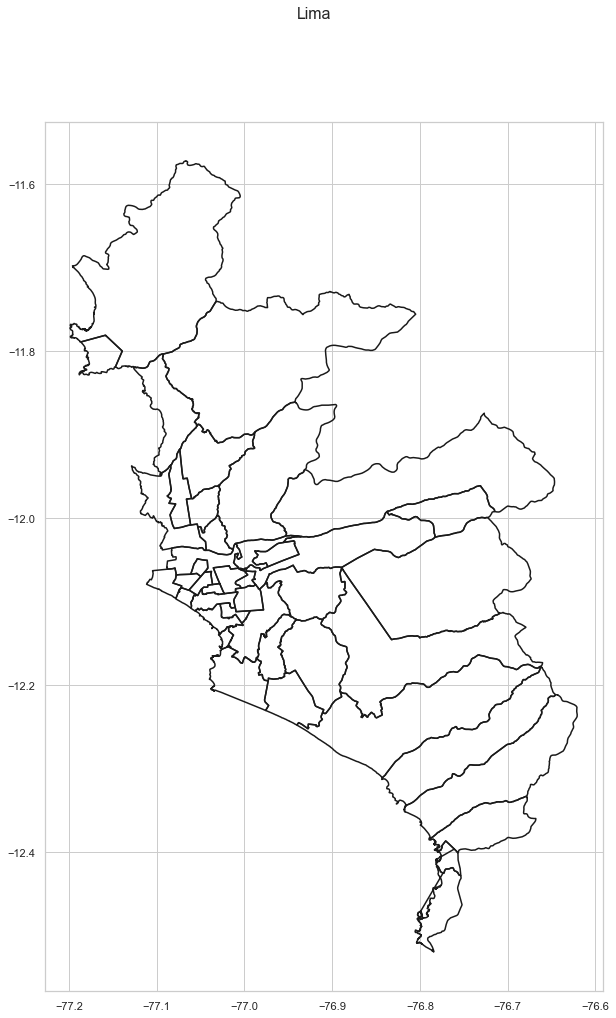

In [24]:
### Código aquí
Plot_SubMap("Lima", DISTLIMAidx, sf,NomDist=False)

3.	Grafique el mapa de Lima, pero añadiendo la muestra de la base “Salarios”.


In [25]:
### Código aquí
def KeepProv(df,codprov=str,ubigeo='ubigeo'):
    df['aux'] = df[ubigeo].str[:4]
    df = df[df['aux'] == codprov]
    df = df.drop(columns=['aux'])
    return df
Salarios_Lima = KeepProv(Salarios,"1501")
len(Salarios_Lima)

889

<Figure size 720x1152 with 0 Axes>

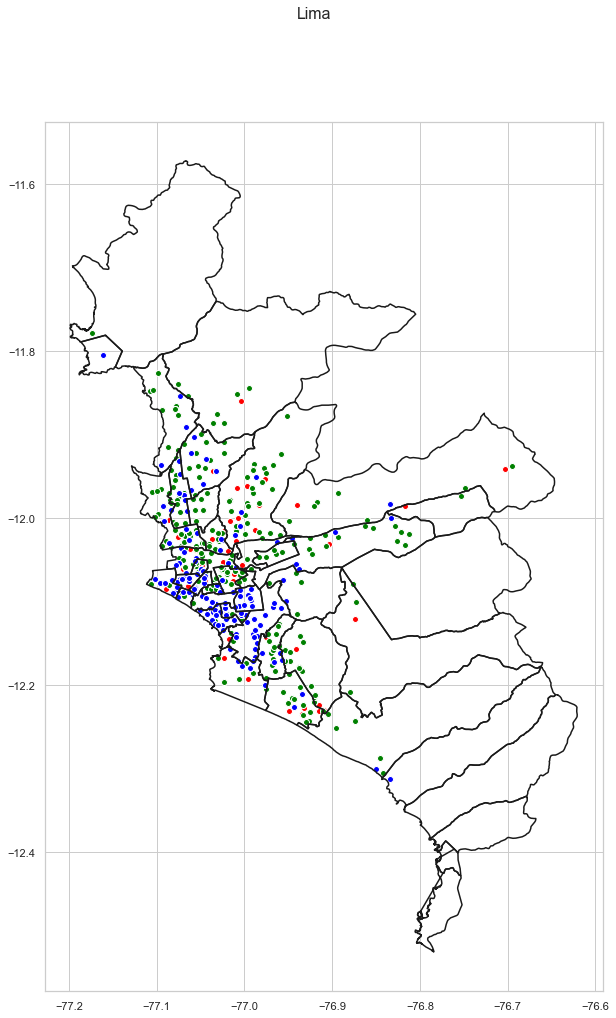

In [26]:
### Código aquí
Plot_SubMap("Lima", DISTLIMAidx, sf,NomDist=False)
plt.scatter(x=Salarios_Lima[Salarios_Lima["Nivel Salario"]=="Mínimo o menos"].longitud, y=Salarios_Lima[Salarios_Lima["Nivel Salario"]=="Mínimo o menos"].latitud, c='red', edgecolor = 'white')
plt.scatter(x=Salarios_Lima[Salarios_Lima["Nivel Salario"]=="Hasta 3000"].longitud, y=Salarios_Lima[Salarios_Lima["Nivel Salario"]=="Hasta 3000"].latitud, c='green', edgecolor = 'white')
plt.scatter(x=Salarios_Lima[Salarios_Lima["Nivel Salario"]=="Hasta 20,000"].longitud, y=Salarios_Lima[Salarios_Lima["Nivel Salario"]=="Hasta 20,000"].latitud, c='blue', edgecolor = 'white')

### Ejercicio 5

1.	Se le ha entregado una función para graficar mapas de calor, pero grafica los colores a la inversa. ¿Puede usted modificarla para que grafique correctamente?


1.1.	 Defina cuál es el argumento errado.


In [ ]:
# Función Errada

def calc_color(data, color=None):
        if color==1: color_sq=['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq=['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494'];colors='YlGnBu';
        elif color == 3: color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];colors = 'Greys';
        elif color == 9: color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404'];colors ='YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

1.2.	 Genere una función que reemplace el dicho argumento.


In [27]:
### Código aquí
def inverserange(x=int):
    lista = []
    while x >= 1:
        x -= 1
        lista += [x]
    return lista;

In [28]:
inverserange(6)

[5, 4, 3, 2, 1, 0]

1.3.	 Reemplace el argumento por la función creada.


In [29]:
# Función Errada

def calc_color(data, color=None):
        if color==1: color_sq=['#dadaebFF','#bcbddcF0','#9e9ac8F0',
                        '#807dbaF0','#6a51a3F0','#54278fF0']; colors = 'Purples';
        elif color == 2: color_sq=['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494'];colors='YlGnBu';
        elif color == 3: color_sq =['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];colors = 'Greys';
        elif color == 9: color_sq =['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000']
        else:            color_sq =['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404'];colors ='YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
                                labels=inverserange(6))                                             
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

1.4.	 Verifique que el gráfico funciona.


In [30]:
def plot_map_fill_multiples_ids_tone(sf, title, ciudad,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    La función se redefine para poder tener un Heatmap o mapa de calor
    '''
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for id in ciudad:
        #print(id)
        shape_ex = sf.shape(id)
        DIST=sf.record(id)['NOMBDIST']

        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[ciudad.index(id)])
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        #plt.text(x0, y0, DIST, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)    

In [31]:
def plot_ciudades_data(sf, title, ciudades, data=None, 
                      color=None, print_id=False,figsize=(11,20)):
    '''
    Se dibuja el mapa con los distritos indicados
    '''
    
    color_ton, bins = calc_color(data, color)
    plot_map_fill_multiples_ids_tone(sf, title, ciudades, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = figsize);

In [32]:
Votos_Lima = KeepProv(Votos,"1401",ubigeo="CCODI_UBIGEO")
Votos_Lima.head()

,DEPARTAMENTO,PROVINCIA,DISTRITO,CCODI_UBIGEO,VOTOS,AUTORIDAD,VOTOS_G
1369,LIMA,LIMA,ANCON,140102,12410,FUERZA POPULAR,2382
1370,LIMA,LIMA,ATE,140103,151169,RENOVACION POPULAR,22780
1371,LIMA,LIMA,BARRANCO,140125,13643,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,3025
1372,LIMA,LIMA,BREÃA,140104,31323,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,6322
1373,LIMA,LIMA,CARABAYLLO,140105,71729,FUERZA POPULAR,10653



1: 625 => 12409 
2: 12410 => 23253 
3: 23254 => 39588 
4: 39589 => 59178 
5: 59179 => 103722 
6: 103723 => 266784 

   1   2   3   4   5   6


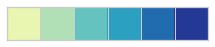

<Figure size 792x1440 with 0 Axes>

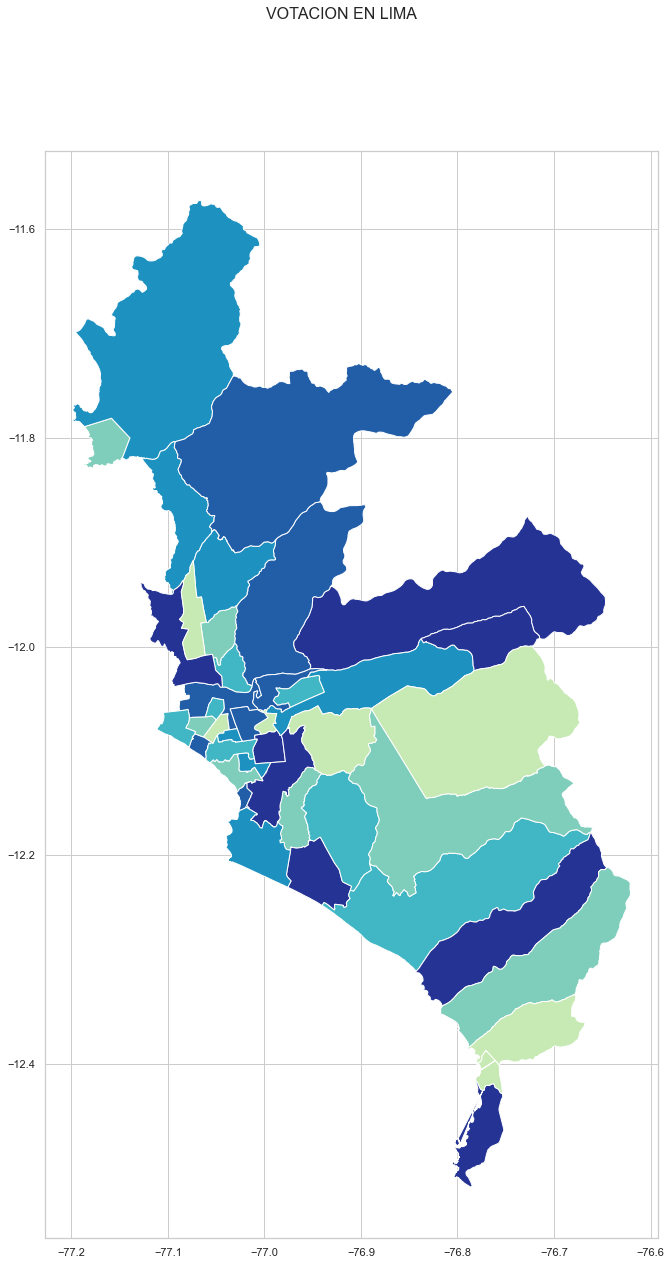

In [33]:
color_pallete = 2 # 'Púrpuras'
plot_ciudades_data(sf,'VOTACION EN LIMA', DISTLIMAidx, data=Votos_Lima.VOTOS,color=color_pallete,print_id=False)

### Extra: Gráfico de concentración de voto.

In [ ]:
Votos_Lima['Concentracion'] = Votos_Lima['VOTOS_G']/Votos_Lima['VOTOS']
Votos_Lima['Concentracion'].describe()
color_pallete = 2 # 'Azules'
plot_ciudades_data(sf,'Concentración de Voto', DISTLIMAidx, data=Votos_Lima.Concentracion,color=color_pallete,print_id=False)